<a href="https://colab.research.google.com/github/SXV357/Inspirit-AI-ML-Basics-Notebooks/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202a%20-%20Linear%20Regression/car_dekho.csv"

# Quiet deprecation warnings
import warnings
warnings.filterwarnings("ignore") 

car_dekho.csv       100%[===================>]  13.91K  --.-KB/s    in 0s      


In [2]:
data_path  = 'car_dekho.csv'
car_data = pd.read_csv(data_path)

In [3]:
car_data.head()

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,5,3.35,27000,Petrol,Dealer,Manual
1,sx4,6,4.75,43000,Diesel,Dealer,Manual
2,ciaz,2,7.25,6900,Petrol,Dealer,Manual
3,wagon r,8,2.85,5200,Petrol,Dealer,Manual
4,swift,5,4.60,42450,Diesel,Dealer,Manual


In [4]:
car_data[['Kms_Driven']].head(10)

,Kms_Driven
0,27000
1,43000
2,6900
3,5200
4,42450
5,2071
6,18796
7,33429
8,20273
9,42367


In [5]:
car_data[['Car_Name']].head(10)

,Car_Name
0,ritz
1,sx4
2,ciaz
3,wagon r
4,swift
5,vitara brezza
6,ciaz
7,s cross
8,ciaz
9,ciaz


In [6]:
print(len(car_data) >= 300)
print(len(car_data))

True
301


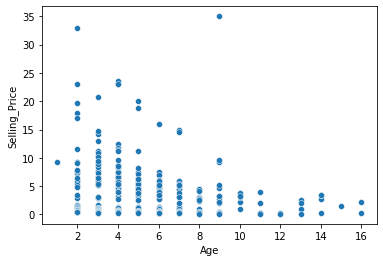

In [8]:
# visualizing car data
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = 'Age', y = 'Selling_Price', data = car_data) # always in this order(need to always specify what data set we're using)

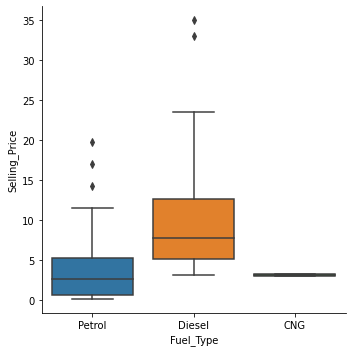

In [9]:
sns.catplot(x = 'Fuel_Type', y = 'Selling_Price', data = car_data, kind = 'box') 

In [11]:
# counting number of petrol vs diesel vs CNG cars in dataset
car_data.groupby(['Fuel_Type']).count()

,Car_Name,Age,Selling_Price,Kms_Driven,Seller_Type,Transmission
Fuel_Type,,,,,,
CNG,2,2,2,2,2,2
Diesel,60,60,60,60,60,60
Petrol,239,239,239,239,239,239


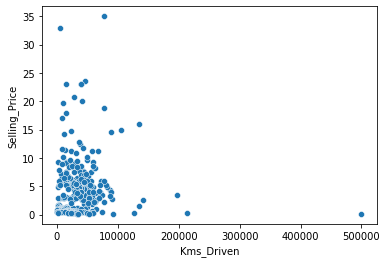

In [12]:
sns.scatterplot(x = 'Kms_Driven', y = 'Selling_Price', data = car_data)

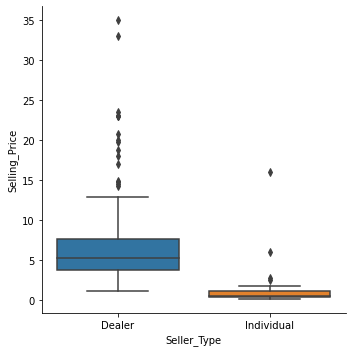

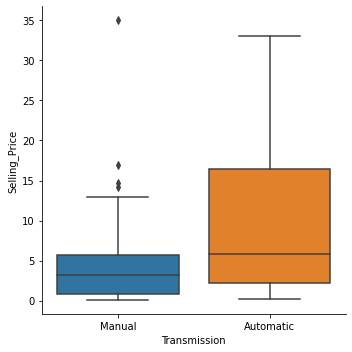

In [14]:
# how does price vary with seller_type and transmission
sns.catplot(x = 'Seller_Type', y = 'Selling_Price', data = car_data, kind = "box")
sns.catplot(x = 'Transmission', y = 'Selling_Price', data = car_data, kind = "box")

In [15]:
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np

# Initializing our X and y variables.
X = car_data[['Age']] # syntax: dataframe[['property']]
y = car_data[['Selling_Price']]

In [16]:
print(X, y)

     Age
0      5
1      6
2      2
3      8
4      5
..   ...
296    3
297    4
298   10
299    2
300    3

[301 rows x 1 columns]      Selling_Price
0             3.35
1             4.75
2             7.25
3             2.85
4             4.60
..             ...
296           9.50
297           4.00
298           3.35
299          11.50
300           5.30

[301 rows x 1 columns]


In [18]:
# loading in the model
linear = LinearRegression()

# train the model 
linear.fit(X, y)

LinearRegression()

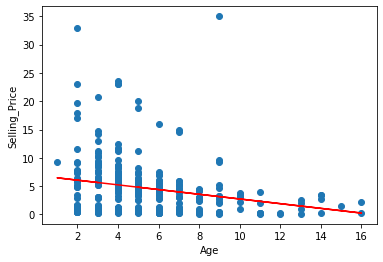

In [19]:
import matplotlib.pyplot as plt

y_pred = linear.predict(X) # get a prediction for variation in y values(else data will be scattered all over)
plt.plot(X, y_pred, color='red')

plt.scatter(X, y) # display data points
plt.xlabel('Age') # set the labels of the x and y axes
plt.ylabel('Selling_Price')
plt.show()

In [21]:
print('Slope in lakhs/year: ', linear.coef_) # slope of best-fit line
print('Price of a brand-new car: ', linear.intercept_) # y-int of best-fit line

Slope in lakhs/year:  [[-0.41509169]]
Price of a brand-new car:  [6.89120688]


In [22]:
# single LR with different inputs

car_data['NewTransmission'] = car_data['Transmission'].replace({'Manual':1, 'Automatic':0}) # convert categorical to quantitative variable
# syantax: dataframe['new property name'] =  dataframe['old property name'].replace({'val1': #1, 'val2': #2})

In [23]:
car_data.head()

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,NewTransmission
0,ritz,5,3.35,27000,Petrol,Dealer,Manual,1
1,sx4,6,4.75,43000,Diesel,Dealer,Manual,1
2,ciaz,2,7.25,6900,Petrol,Dealer,Manual,1
3,wagon r,8,2.85,5200,Petrol,Dealer,Manual,1
4,swift,5,4.60,42450,Diesel,Dealer,Manual,1


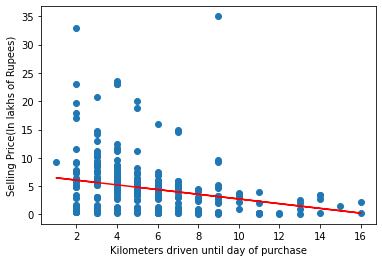

In [27]:
#Initializing our X, y variables

X_column = 'Age'
X = car_data[[X_column]] 
y = car_data[['Selling_Price']]

#Setting up model
linear = LinearRegression()

#Training
linear.fit(X,y)

y_pred = linear.predict(X)
plt.plot(X, y_pred, color='red')

plt.scatter(X, y) # display data points
plt.xlabel('Kilometers driven until day of purchase') # Automated setup of axis labels
plt.ylabel('Selling Price(In lakhs of Rupees)')
plt.show()

In [26]:
# Multiple LR with multiple inputs

x = car_data[['Age', 'NewTransmission', 'Kms_Driven']]

# set up our model
multiple = LinearRegression(fit_intercept = True, normalize = True)

# train the model 
multiple.fit(x, y)

LinearRegression(normalize=True)

In [30]:
# comparing variation in selling price based off of LSRL
print('Our single linear model had an R^2 of: %0.3f'%linear.score(car_data[[X_column]], y)) 
print('Our multiple linear model had an R^2 of: %0.3f'%multiple.score(x, y))

Our single linear model had an R^2 of: 0.056
Our multiple linear model had an R^2 of: 0.203


In [45]:
# checking r^2 with new variable
car_data['NewTypeSeller'] = car_data['Seller_Type'].replace({'Dealer': 0, 'Individual': 1})
X = car_data[['Age', 'NewTransmission', 'Kms_Driven', 'NewTypeSeller']].values
new_multiple = LinearRegression(fit_intercept = True, normalize = True) # set up model
new_multiple.fit(X, y) # train model
  
print('Our multiple linear model had an R^2 of: %0.3f'%new_multiple.score(X, y))

Our multiple linear model had an R^2 of: 0.462


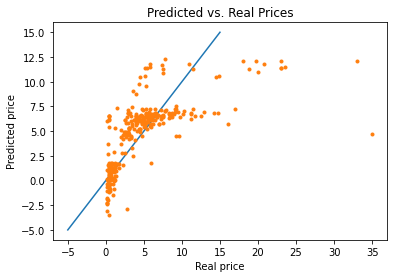

In [43]:
#getting predictions to compare each car's predicted price to its actual one

plt.plot([-5,15],[-5,15]) #Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price")
plt.ylabel("Predicted price")
prediction = new_multiple.predict(X)
plt.plot(y, prediction, '.')
plt.show()

In [44]:
# adding predicted prices to dataframe

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

car_data['Prediction'] = prediction
print (car_data)

    Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  NewTransmission  NewTypeSeller  Prediction
0       ritz    5           3.35       27000    Petrol      Dealer       Manual                1              0    6.032870
1        sx4    6           4.75       43000    Diesel      Dealer       Manual                1              0    5.713381
2       ciaz    2           7.25        6900    Petrol      Dealer       Manual                1              0    7.177459
3    wagon r    8           2.85        5200    Petrol      Dealer       Manual                1              0    4.608766
4      swift    5           4.60       42450    Diesel      Dealer       Manual                1              0    6.135938
..       ...  ...            ...         ...       ...         ...          ...              ...            ...         ...
296     city    3           9.50       33988    Diesel      Dealer       Manual                1              0    6.931938
297     

In [46]:
# comapring real price to predicted price by calculating deal score

car_data['deal_score'] = car_data['Prediction']-car_data['Selling_Price']
print (car_data)

    Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  NewTransmission  NewTypeSeller  Prediction  deal_score
0       ritz    5           3.35       27000    Petrol      Dealer       Manual                1              0    6.032870    2.682870
1        sx4    6           4.75       43000    Diesel      Dealer       Manual                1              0    5.713381    0.963381
2       ciaz    2           7.25        6900    Petrol      Dealer       Manual                1              0    7.177459   -0.072541
3    wagon r    8           2.85        5200    Petrol      Dealer       Manual                1              0    4.608766    1.758766
4      swift    5           4.60       42450    Diesel      Dealer       Manual                1              0    6.135938    1.535938
..       ...  ...            ...         ...       ...         ...          ...              ...            ...         ...         ...
296     city    3           9.50       33988    

In [47]:
# identify most overpriced and best deal cars

sorted_data = car_data.sort_values("deal_score")
best_deals = sorted_data.tail(10)
most_overpriced = sorted_data.head(10)
print (best_deals)
print (most_overpriced)

             Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  NewTransmission  NewTypeSeller  Prediction  deal_score
196         Activa 3g   11           0.17      500000    Petrol  Individual    Automatic                0              1    6.035551    5.865551
77            corolla   15           1.50      135154    Petrol      Dealer    Automatic                0              0    7.370486    5.870486
40             baleno    3           5.85       24524    Petrol      Dealer    Automatic                0              0   11.747177    5.897177
177  Honda Activa 125    3           0.35       24000    Petrol  Individual    Automatic                0              1    6.269951    5.919951
252              brio    4           5.40       31427    Petrol      Dealer    Automatic                0              0   11.367002    5.967002
221               i20    6           4.50       32000    Petrol      Dealer    Automatic                0              0   10.5183

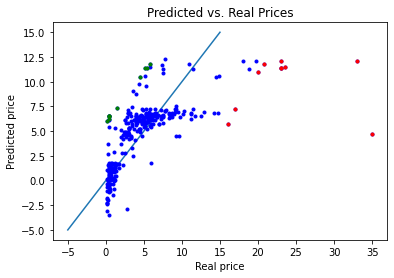

In [48]:
plt.plot([-5,15],[-5,15]) #Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price")
plt.ylabel("Predicted price")
plt.plot(car_data.Selling_Price,car_data.Prediction,'b.')
plt.plot(best_deals.Selling_Price,best_deals.Prediction,'g.')
plt.plot(most_overpriced.Selling_Price,most_overpriced.Prediction,'r.')
plt.show()